In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy
sympy.init_printing()
%matplotlib inline

In [2]:
tau, zeta, t, w, K = sympy.symbols('tau, zeta, t, w, K', real=True, positive=True)
s = sympy.Symbol('s')

In [3]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

This is the standard form for the second order system transfer function

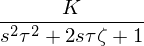

In [4]:
G = K/(tau**2*s**2 + 2*tau*zeta*s + 1)
G

The characteristic equation is the denominator of the transfer function

In [5]:
ce = sympy.Eq(sympy.denom(G), 0)
ce

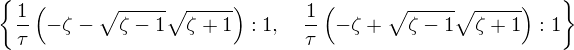

In [6]:
roots = sympy.roots(ce, s)
roots

The shape of the inverse Laplace depends on the nature of the roots, which depends on the value of $\zeta$

Overdamped: $\zeta>1$. Two distinct real roots

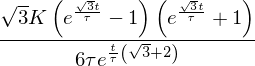

In [7]:
invL(G.subs({zeta: 2}))

Critically damped: $\zeta=1$. Repeated roots.

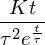

In [8]:
invL(G.subs({zeta: 1}))

Underdamped: $0<\zeta<1$: a complex conjugate pair of roots

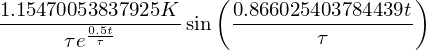

In [9]:
invL(G.subs({zeta: 0.5}))

Unfortunately, some values of the parameters have some "strange" values for the inverse :-(

In [10]:
knownbadvalues = [{K: 5.05, tau: 5., zeta: 1.},
                  {K: 5.05, tau: 5.05, zeta: 1.05}
                  ]
for values in knownbadvalues:
    print invL(G.subs(values))

(0.202*t - 0.404*EulerGamma - 0.404*polygamma(0, 1.0))*exp(-0.2*t)
0.198019801980198*meijerg(((0.728681938243239, 0.855476477598345), ()), ((), (-0.271318061756761, -0.144523522401655)), exp(t))


Matrix exponential
==================
A more uniform strategy is to convert the second order differential equation into two first order differential equations and use the matrix exponential for the solution of the step response.

We can reason that if 
$$ G = \frac{y}{u} = \frac{K}{\tau^2 s^2 + 2 \tau \zeta s + 1},$$

then

$$ y (\tau^2 s^2 + 2 \tau \zeta s + 1) = K u $$

and introducing an auxiliary variable $z=sy$, we have a system

$$ \begin{align}
 2\tau\zeta sy + \tau^2 sz &= K u - y  \\
 sy &= z 
\end{align} $$

Now,

$$ s\begin{bmatrix} 2\tau\zeta & \tau^2 \\ 1 & 0 \end{bmatrix}\begin{bmatrix}y\\z\end{bmatrix} = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}\begin{bmatrix}y\\z\end{bmatrix} + \begin{bmatrix}K\\0\end{bmatrix}u$$

$$\dot{\mathbf{x}}=A\mathbf{x} + Bu$$

In [11]:
LHS = sympy.Matrix([[2*tau*zeta, tau**2],
                    [1, 0]])
RHS1 = sympy.Matrix([[-1, 0],
                    [0, 1]])

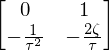

In [12]:
A = LHS.inv()*RHS1
A

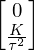

In [13]:
B = LHS.inv()*sympy.Matrix([K, 0])
B

Steady state

In [14]:
x0 = -A.inv()*B
x0

In [15]:
stepresponse = (x0 - sympy.exp(A*t)*x0)[0,0]

The eigenvalues of the A matrix are the same as the roots of the characteristic equation.

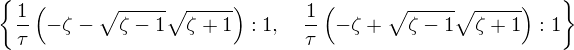

In [16]:
A.eigenvals()

In [17]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [21]:
tmax = 30
ts = numpy.linspace(0, tmax, 100)

def secondorder(K_in, tau_in, zeta_in):
    values = {K: K_in, tau: tau_in, zeta: zeta_in}
    AA = A.subs(values)
    stepresponse = sympy.re((x0.subs(values) - sympy.exp(AA*t)*x0.subs(values))[0,0])
    evalf = sympy.lambdify((t,), stepresponse, modules='numpy')
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Step response')
    tau_height = evalf(tau_in)
    plt.plot(ts, evalf(ts))
    plt.axhline(K_in)
    plt.plot([0, tau_in, tau_in], [tau_height]*2 + [0], alpha=0.4)
    plt.text(0, K_in, '$K=${}'.format(K_in))
    plt.text(0, tau_height, '{:.3}$K$'.format(tau_height))
    plt.text(tau_in, 0, r'$\tau={:.3}$'.format(tau_in))
    plt.ylim(0, 10)
    plt.subplot(1, 2, 2)
    plt.title('Poles plot')
    realpart = [sympy.re(r.subs(values)) for r in roots]
    imagpart = [sympy.im(r.subs(values)) for r in roots]
    plt.scatter(realpart, imagpart, marker='x', s=30)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.axis([-2, 2, -2, 2])

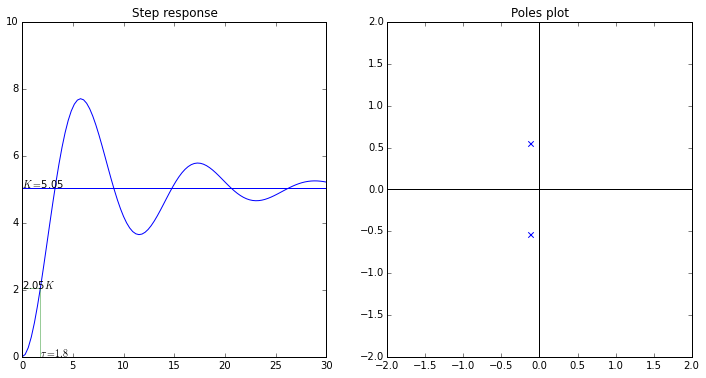

In [22]:
interact(secondorder, K_in=(0.1, 10.), tau_in=(0., 10.), zeta_in=(0., 2));